# Vehicle Price Prediction

**This project is based on the price prediction of  vehicles based on their features.**


### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Importing and reading the data**

In [30]:
auto=pd.read_csv('Automobile_data.csv')
auto

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


### Exploratory Data Analysis

In [28]:
print(auto.describe())

          symboling    wheel-base        length         width        height  \
count  2.050000e+02  2.050000e+02  2.050000e+02  2.050000e+02  2.050000e+02   
mean   4.332578e-17 -1.291108e-15  3.656696e-15  1.089643e-15 -5.372396e-16   
std    1.002448e+00  1.002448e+00  1.002448e+00  1.002448e+00  1.002448e+00   
min   -2.281433e+00 -2.023713e+00 -2.677244e+00 -2.620512e+00 -2.430664e+00   
25%   -6.714717e-01 -7.085959e-01 -6.296552e-01 -8.447824e-01 -7.076263e-01   
50%    1.335090e-01 -2.924196e-01 -6.900603e-02 -1.905661e-01  1.538927e-01   
75%    9.384897e-01  6.065210e-01  7.354037e-01  4.636501e-01  7.282388e-01   
max    1.743470e+00  3.686225e+00  2.766741e+00  2.987056e+00  2.492302e+00   

        curb-weight   engine-size  compression-ratio      city-mpg  \
count  2.050000e+02  2.050000e+02       2.050000e+02  2.050000e+02   
mean   1.126470e-16  3.466062e-17      -3.639365e-16  1.104807e-16   
std    1.002448e+00  1.002448e+00       1.002448e+00  1.002448e+00   
min   -2

In [31]:
print(auto.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

**Checking for null values**

In [35]:
print(auto.isnull().sum())

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


*Since our data does not have any null values, We can move further to the next step.*

*Next,We need to seperate the categoral and numerical columns in our data.*

In [36]:
categoral=[col for col in auto.columns if auto[col].dtype=='object']
print(categoral)

['normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']


In [37]:
numerical=[col for col in auto.columns if auto[col].dtype!='object']
print(numerical)

['symboling', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'compression-ratio', 'city-mpg', 'highway-mpg']


*Viewing the categoral and numerical data seperately.*

In [32]:
auto[categoral]

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm,price
0,?,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000,13495
1,?,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000,16500
2,?,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,2.68,3.47,154,5000,16500
3,164,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.19,3.4,102,5500,13950
4,164,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,3.19,3.4,115,5500,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi,3.78,3.15,114,5400,16845
201,95,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi,3.78,3.15,160,5300,19045
202,95,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi,3.58,2.87,134,5500,21485
203,95,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi,3.01,3.4,106,4800,22470


In [9]:
auto_num=auto[numerical]
auto_num

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
0,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
1,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
2,1,94.5,171.2,65.5,52.4,2823,152,9.0,19,26
3,2,99.8,176.6,66.2,54.3,2337,109,10.0,24,30
4,2,99.4,176.6,66.4,54.3,2824,136,8.0,18,22
...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,9.5,23,28
201,-1,109.1,188.8,68.8,55.5,3049,141,8.7,19,25
202,-1,109.1,188.8,68.9,55.5,3012,173,8.8,18,23
203,-1,109.1,188.8,68.9,55.5,3217,145,23.0,26,27


*Let us work with the numerical data since our prediction is numerical range.*

In [38]:
print(auto_num.isnull().sum())

symboling            0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
compression-ratio    0
city-mpg             0
highway-mpg          0
dtype: int64


In [11]:
for col in numerical:
    print(auto[col].value_counts)

<bound method IndexOpsMixin.value_counts of 0      3
1      3
2      1
3      2
4      2
      ..
200   -1
201   -1
202   -1
203   -1
204   -1
Name: symboling, Length: 205, dtype: int64>
<bound method IndexOpsMixin.value_counts of 0       88.6
1       88.6
2       94.5
3       99.8
4       99.4
       ...  
200    109.1
201    109.1
202    109.1
203    109.1
204    109.1
Name: wheel-base, Length: 205, dtype: float64>
<bound method IndexOpsMixin.value_counts of 0      168.8
1      168.8
2      171.2
3      176.6
4      176.6
       ...  
200    188.8
201    188.8
202    188.8
203    188.8
204    188.8
Name: length, Length: 205, dtype: float64>
<bound method IndexOpsMixin.value_counts of 0      64.1
1      64.1
2      65.5
3      66.2
4      66.4
       ... 
200    68.9
201    68.8
202    68.9
203    68.9
204    68.9
Name: width, Length: 205, dtype: float64>
<bound method IndexOpsMixin.value_counts of 0      48.8
1      48.8
2      52.4
3      54.3
4      54.3
       ... 
200    55.5
201

###### Outlier Detection using Boxplot method

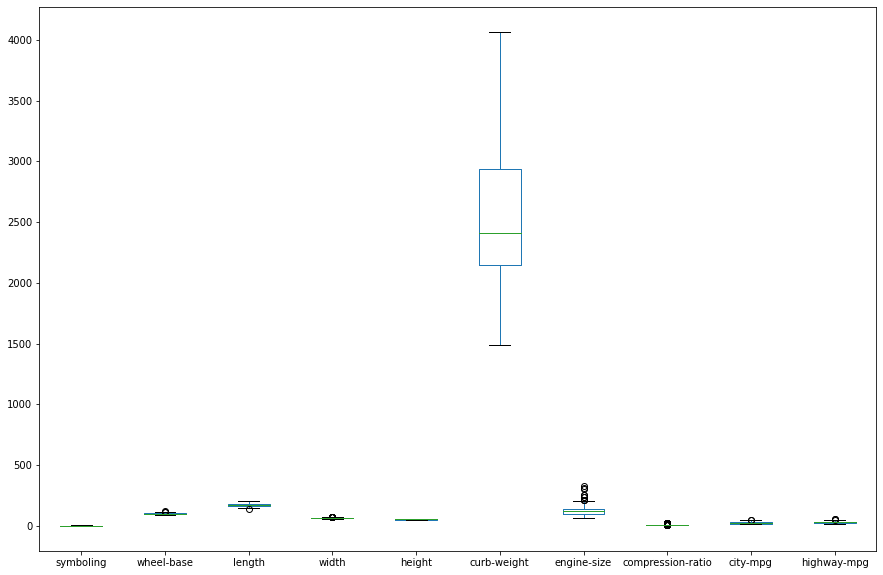

In [39]:
auto_num.plot(kind='box',figsize=(15,10))
plt.show()

*The boxplot shows that there are no much outliers to be handled in the data.*

In [40]:
print(auto.price.dtype)

object


In [41]:
print(auto['price'].value_counts())

?        4
6692     2
6229     2
8495     2
7957     2
        ..
5399     1
6918     1
15645    1
6849     1
18399    1
Name: price, Length: 187, dtype: int64


In [42]:
auto['price'].replace('?',0,inplace=True)
print(auto['price'].value_counts())

0        4
6229     2
6692     2
5572     2
7609     2
        ..
11595    1
6849     1
6669     1
14869    1
18399    1
Name: price, Length: 187, dtype: int64


In [43]:
print(auto['price'].isnull().sum())

0


**Scaling the data**

*Adding the target column 'price' to our numerical dataset and sclaing the data to bring the values of all the columns into a common scale.*

In [17]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
num=['symboling',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'compression-ratio',
 'city-mpg',
 'highway-mpg','price']
auto[num]=scale.fit_transform(auto[num])
auto[num]

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
0,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,-0.288349,-0.646553,-0.546059,0.067694
1,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,-0.288349,-0.646553,-0.546059,0.440555
2,0.133509,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-0.288349,-0.953012,-0.691627,0.440555
3,0.938490,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.035973,-0.186865,-0.109354,0.124151
4,0.938490,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.540725,-1.106241,-1.273900,0.558431
...,...,...,...,...,...,...,...,...,...,...,...
200,-1.476452,1.721873,1.198549,1.398245,0.728239,0.763241,0.339248,-0.162161,-0.340094,-0.400490,0.483363
201,-1.476452,1.721873,1.198549,1.351515,0.728239,0.949992,0.339248,-0.364062,-0.953012,-0.837195,0.756339
202,-1.476452,1.721873,1.198549,1.398245,0.728239,0.878757,1.109571,-0.338824,-1.106241,-1.128332,1.059094
203,-1.476452,1.721873,1.198549,1.398245,0.728239,1.273437,0.435538,3.244916,0.119594,-0.546059,1.181313


*Mapping the correlation among the columns*

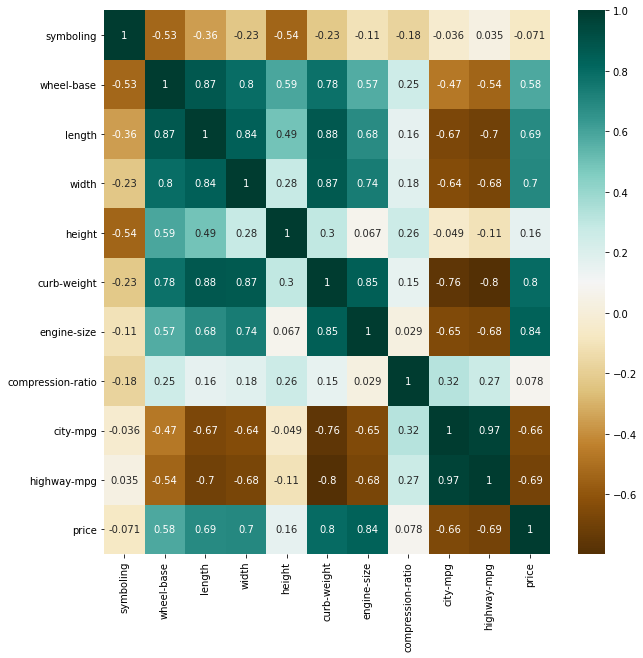

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(auto[num].corr(),annot=True,cmap='BrBG')
plt.show()

**Our preprocessed dataset is now ready for building the model...**

In [20]:
x=auto[num].iloc[:,:-1]
x

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
0,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,-0.288349,-0.646553,-0.546059
1,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,-0.288349,-0.646553,-0.546059
2,0.133509,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-0.288349,-0.953012,-0.691627
3,0.938490,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.035973,-0.186865,-0.109354
4,0.938490,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.540725,-1.106241,-1.273900
...,...,...,...,...,...,...,...,...,...,...
200,-1.476452,1.721873,1.198549,1.398245,0.728239,0.763241,0.339248,-0.162161,-0.340094,-0.400490
201,-1.476452,1.721873,1.198549,1.351515,0.728239,0.949992,0.339248,-0.364062,-0.953012,-0.837195
202,-1.476452,1.721873,1.198549,1.398245,0.728239,0.878757,1.109571,-0.338824,-1.106241,-1.128332
203,-1.476452,1.721873,1.198549,1.398245,0.728239,1.273437,0.435538,3.244916,0.119594,-0.546059


In [44]:
y=auto[num].iloc[:,-1]
print(y)

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 205, dtype: object


### Building the model

In [45]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=4)

*Here we are building Random Forest Regressor model with 1000 regressors.*

In [23]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=1000,max_depth=7,random_state=3).fit(xtrain,ytrain)
ypred=model.predict(xtest)

### Evaluating the model

In [24]:
from sklearn.metrics import *
import math
print('mae:',mean_absolute_error(ytest,ypred))
print('mse:',mean_squared_error(ytest,ypred))
print('rmse:',math.sqrt(mean_squared_error(ytest,ypred)))

mae: 0.20205617176561505
mse: 0.09204661502107818
rmse: 0.30339185061744517


*The score of mean squared error,mean absolute error and root mean squared error are very low.Thus we can infer that our model will have a good accuracy.*

In [25]:
print('accuracy:',r2_score(ytest,ypred))

accuracy: 0.908294519173425


*Our model has an accuracy of 90.8% which is a pretty good level.*

*Comparing the actual and predicted prices using graph.*

In [26]:
output=pd.DataFrame({'ytest':ytest,'ypred':ypred})
output

,ytest,ypred
1,0.440555,0.078998
82,-0.039759,0.174978
76,-0.938098,-0.790159
102,0.179863,0.296114
71,2.634786,2.674419
...,...,...
146,-0.680756,-0.502107
112,0.490187,0.239690
29,0.001808,0.155645
158,-0.626782,-0.625157


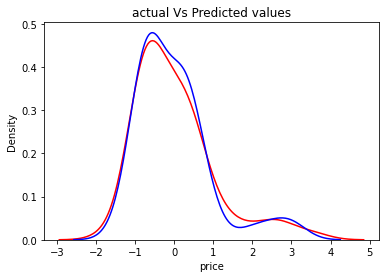

In [27]:
ax=sns.distplot(ytest,hist=False,color='r',label="actual value")
sns.distplot(ypred,hist=False,color='b',label="predicted value",ax=ax)
plt.title('actual Vs Predicted values')
plt.show()

*The graph shows that our predicted price is very close to the actual price.*

*Thus we have successfully built a basic model to predict the price of vehicles with high accuracy rate.*